In [1]:
import numpy as np
import pandas as pd
import sys
import os

## Tabla Clientes por cada Planta

Esta tabla enumera todos los casos especiales, en los que el almacén solo puede brindar soporte a un cliente específico, mientras que cualquier otro almacén no registrado en la tabla puede abastecer a cualquier cliente.

In [2]:
clientes_por_planta = pd.read_excel("data.xlsx", sheet_name = "VmiCustomers")

clientes_por_planta.columns = ["Planta", "Cliente"]

In [3]:
clientes_por_planta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Planta   14 non-null     object
 1   Cliente  14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


*¿La tabla contiene filas duplicadas?*

In [4]:
clientes_por_planta.duplicated().any()

False

In [5]:
values = np.arange(1, 16, 1)

clientes_por_planta["Planta"] = clientes_por_planta["Planta"].replace({"[^\d.]": ""}, regex = True).astype(int)
clientes_por_planta = clientes_por_planta.loc[clientes_por_planta["Planta"].isin(values), :]

clientes_por_planta.head()

,Planta,Cliente
0,2,V5555555555555_16
1,2,V555555555555555_29
2,2,V555555555_3
3,2,V55555555555555_8
4,2,V55555555_9


In [6]:
sys.path.append(os.path.abspath(".."))

from functions import combined_table

planta = values[~np.isin(values, clientes_por_planta["Planta"])]
clientes = clientes_por_planta["Cliente"].unique()

df = combined_table("Planta", "Cliente", planta, clientes)

df.head()

,Planta,Cliente
0,1,V5555555555555_16
1,3,V5555555555555_16
2,4,V5555555555555_16
3,5,V5555555555555_16
4,7,V5555555555555_16


In [7]:
clientes_por_planta_ = pd.concat([clientes_por_planta, df]).reset_index(drop = True)

clientes_por_planta.head()

,Planta,Cliente
0,2,V5555555555555_16
1,2,V555555555555555_29
2,2,V555555555_3
3,2,V55555555555555_8
4,2,V55555555_9


In [8]:
clientes_agrup_por_planta = clientes_por_planta_.groupby(by = "Planta").agg({"Planta": "size"}).rename(columns = {"Planta": "Recuento de Clientes"})

clientes_agrup_por_planta

,Recuento de Clientes
Planta,
1,10
2,7
3,10
4,10
5,10
6,2
7,10
8,10
9,10


*Estadística descriptiva de Clientes por cada Planta*

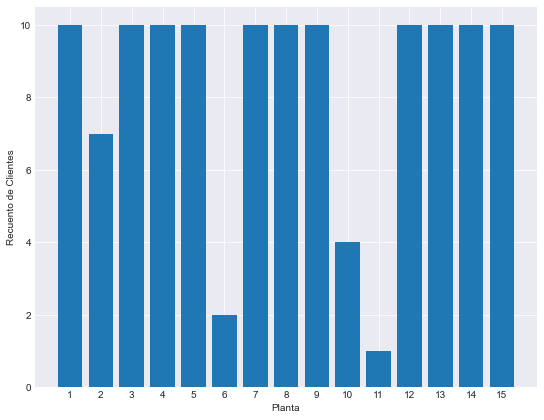

In [9]:
from functions import plot_bar

plot_bar("Planta", "Recuento de Clientes", clientes_agrup_por_planta.index, clientes_agrup_por_planta["Recuento de Clientes"])